# Import Libaries

In [30]:
import pandas as pd
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,SGDRegressor
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# EDA (Small)

In [31]:
data=pd.read_csv("Big Mart Sale Data.csv")
df=pd.DataFrame(data)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


<ul>
    <li><b>Item_Identifier:</b> <span>Unique product ID</span></li>
    <li><b>Item_Weight:</b> <span>Weight of product</span></li>
    <li><b>Item_Fat_Content:</b> <span>Whether the product is low fat or not</span></li>
    <li><b>Item_Visibility :</b> <span>The % of total display area of all products in a store allocated to the particular product</span></li>
    <li><b>Item_Type:</b> <span>The category to which the product belongs</span></li>
    <li><b>Item_MRP:</b> <span>Maximum Retail Price (list price) of the product</span></li>
    <li><b>Outlet_Identifier:</b> <span>Unique store ID</span></li>
    <li><b>Outlet_Establishment_Year:</b> <span>The year in which store was established</span></li>
    <li><b>Outlet_Size:</b> <span>The size of the store in terms of ground area covered</span></li>
    <li><b>Outlet_Location_Type:</b> <span>The type of city in which the store is located</span></li>
    <li><b>Outlet_Type:</b> <span>Whether the outlet is just a grocery store or some sort of supermarket</span></li>
    <li><b>Item_Outlet_Sales:</b> <span>Sales of the product in the particular store. This is the outcome variable to be predicted.(Target)</span></li>
</ul>

In [32]:
profile = ProfileReport(df, title="Data Profile Report",  minimal=False) 
profile.to_file('./Data Profile Report (EDA).html') # this will generate html file for EDA

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Pre-Processing

In [33]:
df.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


**We don't need Item_Identifier and Outlet_Identifier**

In [34]:
df=df.drop(columns=['Item_Identifier','Outlet_Identifier'])

In [35]:
df.isna().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**We have lots of missing values in two columns and they have very low correlation => 1.Item_Weight , 2.Outlet_Size**

In [36]:
df=df.drop(columns=['Item_Weight','Outlet_Size'])
df.isna().sum()

Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

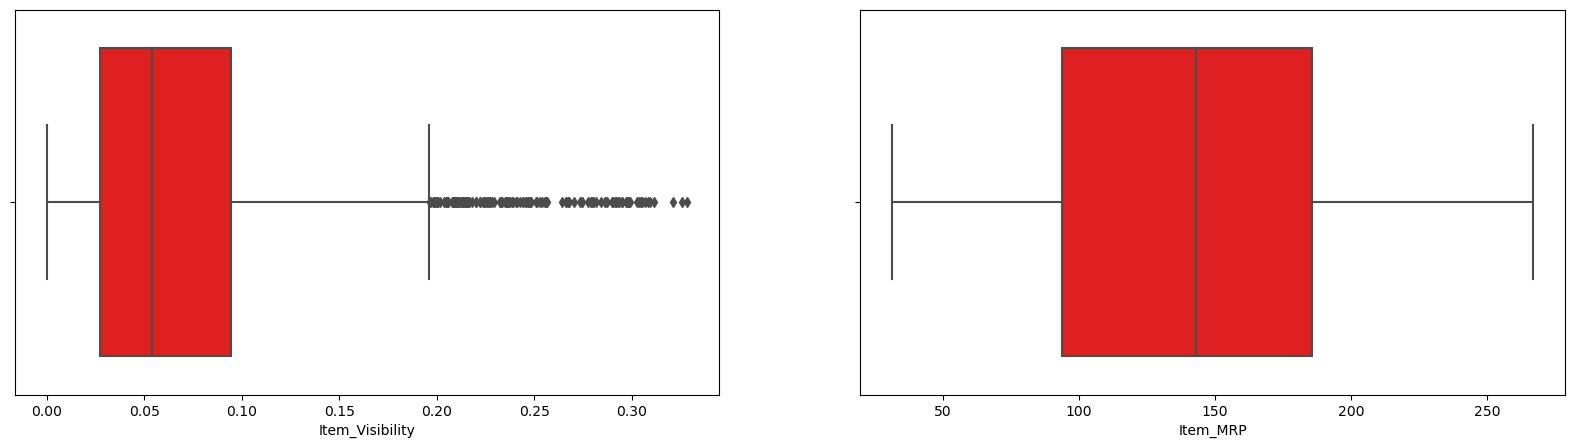

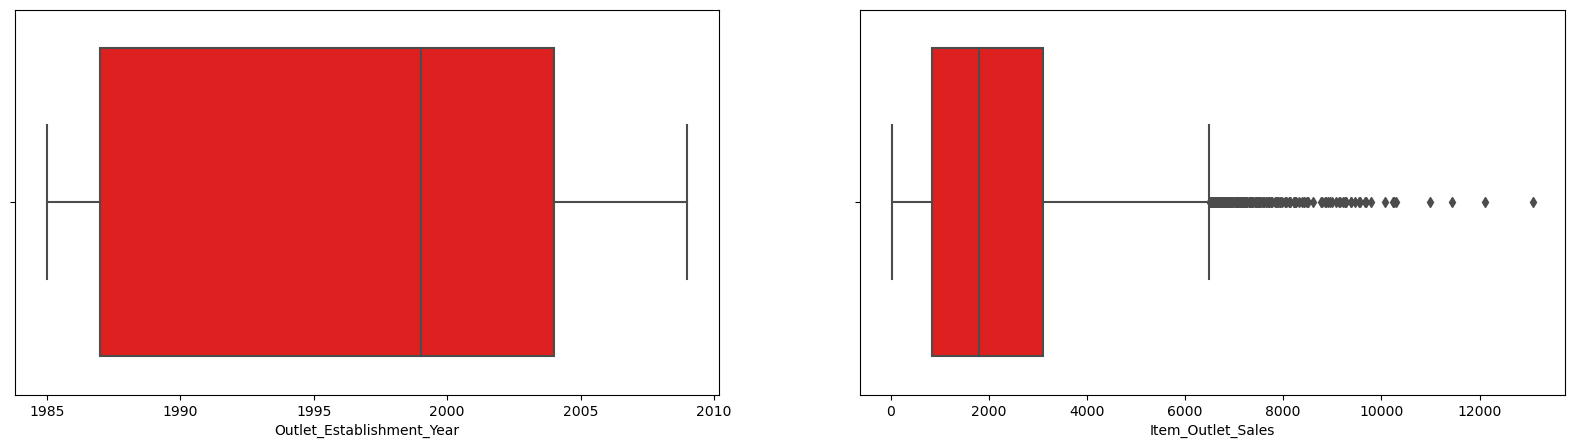

In [37]:
df_check_noises = pd.DataFrame(df,columns=["Item_Visibility", "Item_MRP", "Outlet_Establishment_Year","Item_Outlet_Sales"])
i = 0
while i < 4:
    plt.figure(figsize=[20, 5])
    for j in range(1, 3):  
        plt.subplot(1, 2, j)
        sns.boxplot(x=df_check_noises.iloc[:, i],data=df_check_noises,color='red')
        i += 1
        if i >= 4: 
            break
    plt.show()

In [38]:
len(df[df["Item_Outlet_Sales"]>8000])

50

In [39]:
len(df[df["Item_Visibility"]>0.20])

134

**I think we don't hava noise**

In [40]:
df=df.replace("low fat","Low Fat")
df=df.replace("LF","Low Fat")
df=df.replace("reg","Regular")

In [41]:
print("Unique values of ","Item_Fat_Content:\n",pd.unique(df['Item_Fat_Content']),"\n")
print("Unique values of ","Item_Type:\n",pd.unique(df['Item_Type']),"\n")
print("Unique values of ","Outlet_Location_Type:\n",pd.unique(df['Outlet_Location_Type']),"\n")
print("Unique values of ","Outlet_Type:\n",pd.unique(df['Outlet_Type']))

Unique values of  Item_Fat_Content:
 ['Low Fat' 'Regular'] 

Unique values of  Item_Type:
 ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood'] 

Unique values of  Outlet_Location_Type:
 ['Tier 1' 'Tier 3' 'Tier 2'] 

Unique values of  Outlet_Type:
 ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [42]:
df = pd.get_dummies(df, drop_first=True)
df=df.replace(True,1)
df=df.replace(False,0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Visibility                  8523 non-null   float64
 1   Item_MRP                         8523 non-null   float64
 2   Outlet_Establishment_Year        8523 non-null   int64  
 3   Item_Outlet_Sales                8523 non-null   float64
 4   Item_Fat_Content_Regular         8523 non-null   int64  
 5   Item_Type_Breads                 8523 non-null   int64  
 6   Item_Type_Breakfast              8523 non-null   int64  
 7   Item_Type_Canned                 8523 non-null   int64  
 8   Item_Type_Dairy                  8523 non-null   int64  
 9   Item_Type_Frozen Foods           8523 non-null   int64  
 10  Item_Type_Fruits and Vegetables  8523 non-null   int64  
 11  Item_Type_Hard Drinks            8523 non-null   int64  
 12  Item_Type_Health and

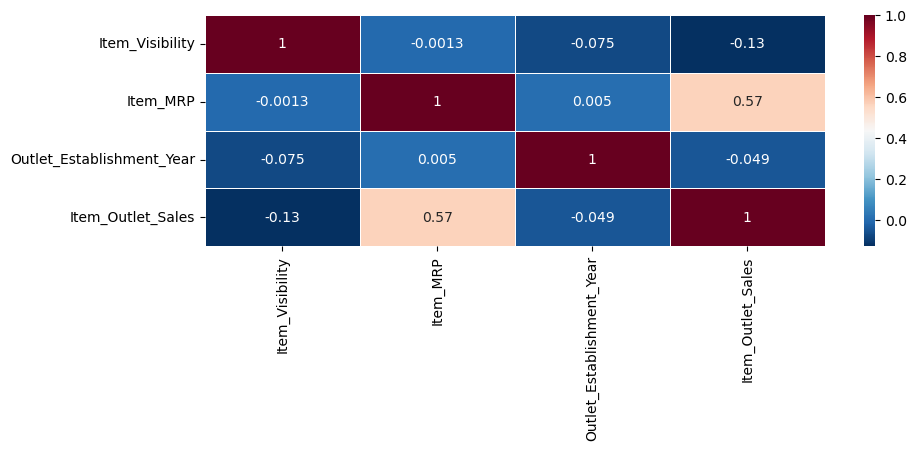

In [43]:
df_corr=pd.DataFrame(df,columns=['Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales'])
fig, ax = plt.subplots(figsize = (10, 3))
ax = sns.heatmap(df_corr.corr(numeric_only =True),cmap='RdBu_r',cbar=True,annot=True,linewidths=0.5,ax=ax)
plt.show()

In [44]:
x=df.drop(columns=['Item_Outlet_Sales'])
y=df.Item_Outlet_Sales

In [45]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.15,random_state=42)
print("x_train shape : ",x_train.shape)
print("x_test shape : ",x_test.shape)
print("y_train shape : ",y_train.shape)
print("y_test shape : ",y_test.shape)

x_train shape :  (7244, 24)
x_test shape :  (1279, 24)
y_train shape :  (7244,)
y_test shape :  (1279,)


In [46]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_norm=scaler.transform(x_train)
x_test_norm=scaler.transform(x_test)

# Model

In [47]:
model_sgd_reg=SGDRegressor()
model_sgd_reg.fit(x_train_norm,y_train)
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,model_sgd_reg.predict(x_test_norm)))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,model_sgd_reg.predict(x_test_norm)))
print('Root Mean Squared Error',np.sqrt(metrics.mean_squared_error(y_test,model_sgd_reg.predict(x_test_norm))))
print('R2 Score:',metrics.r2_score(y_test,model_sgd_reg.predict(x_test_norm)))


Mean Absolute Error: 799.3415225934131
Mean Squared Error: 1186478.8853531815
Root Mean Squared Error 1089.2561155913615
R2 Score: 0.5782838271770299


In [48]:
model_ln_reg=LinearRegression()
model_ln_reg.fit(x_train_norm,y_train)
metrics.r2_score(y_test,model_ln_reg.predict(x_test_norm))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,model_ln_reg.predict(x_test_norm)))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,model_ln_reg.predict(x_test_norm)))
print('Root Mean Squared Error',np.sqrt(metrics.mean_squared_error(y_test,model_ln_reg.predict(x_test_norm))))
print('R2 Score:',metrics.r2_score(y_test,model_ln_reg.predict(x_test_norm)))

Mean Absolute Error: 798.6173389553243
Mean Squared Error: 1180659.5687927494
Root Mean Squared Error 1086.5815978529865
R2 Score: 0.5803522162049393


In [49]:
model_ridge_reg=Ridge()
model_ridge_reg.fit(x_train_norm,y_train)
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,model_ridge_reg.predict(x_test_norm)))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,model_ridge_reg.predict(x_test_norm)))
print('Root Mean Squared Error',np.sqrt(metrics.mean_squared_error(y_test,model_ridge_reg.predict(x_test_norm))))
print('R2 Score:',metrics.r2_score(y_test,model_ridge_reg.predict(x_test_norm)))

Mean Absolute Error: 798.5913574067896
Mean Squared Error: 1180646.3116796825
Root Mean Squared Error 1086.5754974596484
R2 Score: 0.5803569282474832


In [50]:
model_lasso_reg=Lasso()
model_lasso_reg.fit(x_train_norm,y_train)
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,model_lasso_reg.predict(x_test_norm)))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,model_lasso_reg.predict(x_test_norm)))
print('Root Mean Squared Error',np.sqrt(metrics.mean_squared_error(y_test,model_lasso_reg.predict(x_test_norm))))
print('R2 Score:',metrics.r2_score(y_test,model_lasso_reg.predict(x_test_norm)))

Mean Absolute Error: 798.2273146869701
Mean Squared Error: 1179988.4716816652
Root Mean Squared Error 1086.272742768438
R2 Score: 0.5805907476350158


In [51]:
metric_df = pd.DataFrame({'model': ['SGDRegressor', 'LinearRegression', 'Ridge', 'Lasso'], 
                          'R2 Score': [metrics.r2_score(y_test,model_sgd_reg.predict(x_test_norm)),
                                       metrics.r2_score(y_test,model_ln_reg.predict(x_test_norm)),
                                         metrics.r2_score(y_test,model_ridge_reg.predict(x_test_norm)),
                                         metrics.r2_score(y_test,model_lasso_reg.predict(x_test_norm))],
                          'RMSE': [np.sqrt(metrics.mean_squared_error(y_test,model_sgd_reg.predict(x_test_norm))),
                                      np.sqrt(metrics.mean_squared_error(y_test,model_ln_reg.predict(x_test_norm))),
                                         np.sqrt(metrics.mean_squared_error(y_test,model_ridge_reg.predict(x_test_norm))),
                                         np.sqrt(metrics.mean_squared_error(y_test,model_lasso_reg.predict(x_test_norm)))],
                                         })
metric_df

,model,R2 Score,RMSE
0,SGDRegressor,0.578284,1089.256116
1,LinearRegression,0.580352,1086.581598
2,Ridge,0.580357,1086.575497
3,Lasso,0.580591,1086.272743


<Axes: xlabel='model'>

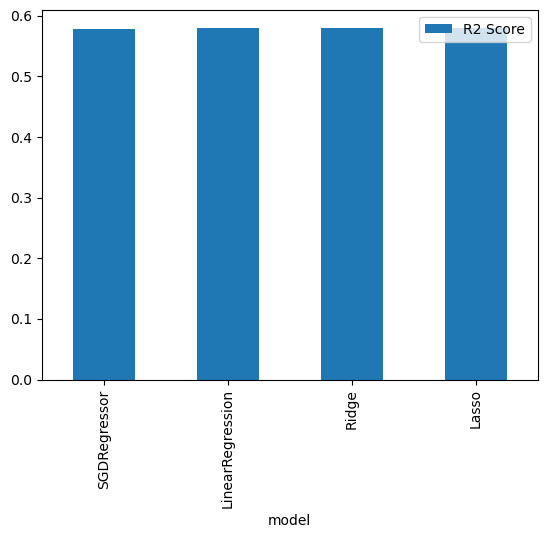

In [52]:
metric_df.plot(kind='bar', x='model', y=['R2 Score'])

In [53]:
k_fold=KFold(n_splits=17)
results=(cross_val_score(model_lasso_reg,x,y,cv=k_fold,n_jobs=-1))
print(results)
print(np.mean(results))

[0.56912468 0.54830607 0.5974659  0.55785079 0.54070141 0.5393987
 0.5641409  0.54480512 0.54272988 0.54682205 0.57673482 0.58661956
 0.54896751 0.56737285 0.55732959 0.57968568 0.53673073]
0.559105072033478


# Prediction

In [54]:
x_train.iloc[0]

Item_Visibility                       0.109991
Item_MRP                            172.908000
Outlet_Establishment_Year          2004.000000
Item_Fat_Content_Regular              0.000000
Item_Type_Breads                      0.000000
Item_Type_Breakfast                   0.000000
Item_Type_Canned                      0.000000
Item_Type_Dairy                       0.000000
Item_Type_Frozen Foods                0.000000
Item_Type_Fruits and Vegetables       1.000000
Item_Type_Hard Drinks                 0.000000
Item_Type_Health and Hygiene          0.000000
Item_Type_Household                   0.000000
Item_Type_Meat                        0.000000
Item_Type_Others                      0.000000
Item_Type_Seafood                     0.000000
Item_Type_Snack Foods                 0.000000
Item_Type_Soft Drinks                 0.000000
Item_Type_Starchy Foods               0.000000
Outlet_Location_Type_Tier 2           1.000000
Outlet_Location_Type_Tier 3           0.000000
Outlet_Type_S

In [55]:
x_train_norm[0]

array([ 0.84627799,  0.498705  ,  0.73057562, -0.74174247, -0.17278597,
       -0.11152961, -0.28748623, -0.29307707, -0.33271946,  2.42205506,
       -0.16278364, -0.25368284, -0.34837082, -0.22599493, -0.14341957,
       -0.08420348, -0.40666899, -0.23365166, -0.13728326,  1.43137051,
       -0.80816238,  0.72948537, -0.35358084, -0.35234428])

In [56]:
y_train.iloc[2221]

3418.883

In [57]:
df_input=pd.DataFrame({"Item_Visibility":[0.109991],
                       "Item_MRP":[172.908],
                       "Outlet_Establishment_Year":[2004],
                       "Item_Fat_Content_Regular":[0]	,
                       "Item_Type_Breads":[0],
                       "Item_Type_Breakfast":[0],
                       "Item_Type_Canned":[0],
                       "Item_Type_Dairy":[0],
                       "Item_Type_Frozen Foods":[0],
                       "Item_Type_Fruits and Vegetables":[1],
                       "Item_Type_Hard Drinks":[0],
                       "Item_Type_Health and Hygiene":[0],
                       "Item_Type_Household":[0],
                       "Item_Type_Meat":[0],
                       "Item_Type_Others":[0],
                       "Item_Type_Seafood":[0],
                       "Item_Type_Snack Foods":[0],
                       "Item_Type_Soft Drinks":[0],
                       "Item_Type_Starchy Foods":[0],
                       "Outlet_Location_Type_Tier 2":[1],
                       "Outlet_Location_Type_Tier 3":[0],
                       "Outlet_Type_Supermarket Type1":[1],
                       "Outlet_Type_Supermarket Type2":[0],
                       "Outlet_Type_Supermarket Type3":[0]})

In [58]:
model_lasso_reg.predict(scaler.transform(df_input))

array([2829.21708281])